# Вектора

In [37]:
import functools
import math
import matplotlib.pyplot as plt
import collections as clt
import random as rnd

Суммирование векторов

In [19]:
def vector_add(v,w):
    return [v_i + w_i
            for v_i, w_i in zip(v,w)]

In [20]:
vector_add([1,2],[2,1])

[3, 3]

Разница векторов

In [7]:
def vector_subtract(v,w):
    return [v_i - w_i
           for v_i, w_i in zip(v,w)]

In [8]:
vector_subtract([0,15,10,-1],[2,5,6,1])

[-2, 10, 4, -2]

Покомпонентная сумма списка векторов

In [17]:
def vector_sum(vectors):
    return functools.reduce(vector_add,vectors)

In [23]:
vector_sum([[1,2],[1,2],[10,10]])

[12, 14]

Умножение вектора на скаляр

In [24]:
def scalar_multiply(scalar,vector):
    return [scalar * v_i for v_i in vector]

In [25]:
scalar_multiply(5,[1,1])

[5, 5]

Вычисление покомпонентного среднего значения списка векторов(одинакового размера)

In [26]:
def vector_mean(vectors):
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [27]:
vector_mean([[1,2],[1,2],[10,10]])

[4.0, 4.666666666666666]

Вычисление скалярного произведения. 
Скалярное произведение - сумма двух векторов их покомпонентных произведений

In [28]:
def dot(v,w):
    return sum(v_i * w_i
              for v_i , w_i in zip(v,w))

In [29]:
dot([1,1],[1,1])

2

Вычисление суммы квадратов вектора

In [30]:
def sum_of_squares(v):
    return dot(v,v)

In [31]:
sum_of_squares([2,2])

8

Вычисление величины(длинны) вектора

In [33]:
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

In [34]:
magnitude([2,2])

2.8284271247461903

#### Растстояние между двумя векторами по формуле
> 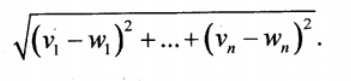

Квадрат расстояние между двумя векторами

In [35]:
def squared_distance(v,w):
    return sum_of_squares(vector_subtract(v,w))

In [37]:
squared_distance([2,2],[2,2])

0

расстояние между двумя векторами

In [38]:
def distance(v,w):
    return math.sqrt(squared_distance(v,w))

In [40]:
distance([15,1],[1,15])

19.79898987322333

# Матрицы

Образование формы матрицы:


In [1]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows , num_cols

In [2]:
Matrix = [[1,1,1],
          [0,1,0],
          [1,0,1]]
shape(Matrix)

(3, 3)

Получение строк и столбцов матрицы

In [4]:
def get_row(A,i):
    '''Get i matrix row'''
    return A[i]
def get_column(A,j):
    '''Get j matrix column'''
    return [A_i[j]
           for A_i in A]

In [5]:
A = [[1,0,1],
    [0,1,0],
    [1,0,1]]

In [7]:
get_row(A,1)

[0, 1, 0]

In [8]:
get_column(A,0)

[1, 0, 1]

Генерация Матрицы по размеру

In [17]:
def make_matrix(num_rows,num_cols,entry_fn):
    '''Matrix generation by num_rows, num_cols and entry function'''
    return [[entry_fn(i,j)
           for j in range(num_cols)]
           for i in range(num_rows)]

Входная функция для функции генерации представленной выше, которая
позволяет генерировать единичную матрицу(единицы по диагонали)

In [18]:
def is_diagonal(i,j):
    return 1 if i == j else 0

In [19]:
identity_matrix = make_matrix(3,3, is_diagonal)

In [20]:
identity_matrix

[[1, 0, 0], [0, 1, 0], [0, 0, 1]]

Матрицы мы можем использовать для представления набора данных, состоящего из нескольких векторов, рассматривая каждую строку матрицы в качестве вектора. Например, если имеются данные о росте, весе и возрасте n количества человек, то их можно представить в виде матрицы n x 3. 

In [21]:
#Пример для примечание выше в случае с данными о трёх особях
data = [[175,68,40],
        [163,64,26],
        [193,78,19]]

Матрицу размера n x k можно использовать в качестве линейной функции, которая отображает k-мерные векторы в n-мерные. Некоторые методы и концепции при анализе данных будут использовать подобные функции.

### Матрицу 
также можно использовать для двоичного представления дружеских связей. Например в социальной сети друзей можно представить в виде множества пар
(i,j). Альтернативная реализация подразумевает создание матрицы смежности, т.е такой матрицы А, что элемент А[i][j] равен 1, если узлы i и j связаны между собой и следовательно 0 в противных случаях.

In [23]:
#Вид взаимосвязей между аккаунтами приведённом в начале примечания выше
friendships = [(0,1),(0,2),(1,2),(1,3),(2,3),(3,4),
              (4,5),(5,6),(5,7),(6,8),(7,8),(8,9)]

In [26]:
#Вид взаимосвязей между аккаунтами приведнном
#с помощью матрицы из примечания выше

# пользователь: 1 2 3 4 5
friendships = [[0,1,1,1,0],
               [1,0,1,0,1],
               [1,0,1,1,1],
               [0,1,1,1,0],
               [0,1,1,0,0],]

#При отсутсвии каких либо взаимосвязей:

friendships = [[0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0],]

#Все друг с другом дружат:

friendships = [[1,1,1,1,1],
               [1,1,1,1,1],
               [1,1,1,1,1],
               [1,1,1,1,1],
               [1,1,1,1,1],]

# СТАТИСТИКА

## Описание одиночного набора данных

Любой набор данных очевидным образом характеризует сам себя

In [100]:
# Число друзей
num_friends = [100,49,41,40,25]

#будем использовать далее случайным образом сгенерированную выборку 
#данных для наглядности

#примечание: в данном примере не будет использоваться библиотека numpy
#которую зачастую для подобных задач и используют

num_friends = []
for i in range(0,250):
    n = rnd.randint(0,100)
    num_friends.append(n)
print(num_friends)

[67, 18, 38, 63, 56, 4, 74, 14, 37, 2, 88, 37, 16, 44, 29, 96, 81, 95, 8, 15, 6, 40, 55, 40, 41, 75, 57, 95, 66, 18, 99, 12, 13, 100, 43, 82, 93, 36, 67, 99, 20, 92, 35, 5, 63, 26, 8, 41, 73, 63, 34, 49, 28, 95, 13, 97, 4, 52, 17, 96, 66, 98, 83, 3, 17, 91, 53, 61, 34, 77, 80, 3, 100, 71, 45, 13, 95, 84, 1, 52, 32, 18, 17, 77, 9, 30, 66, 17, 52, 92, 86, 54, 41, 41, 75, 11, 59, 15, 88, 42, 20, 28, 72, 83, 41, 93, 22, 66, 16, 40, 75, 7, 17, 86, 31, 49, 29, 50, 74, 44, 6, 82, 96, 34, 15, 42, 56, 47, 63, 3, 75, 67, 51, 12, 25, 22, 87, 28, 95, 7, 42, 0, 0, 56, 78, 79, 56, 77, 18, 85, 82, 16, 15, 74, 78, 76, 23, 31, 49, 9, 17, 93, 100, 96, 33, 32, 12, 32, 92, 62, 68, 47, 91, 84, 28, 59, 65, 90, 42, 10, 13, 14, 58, 82, 38, 57, 32, 100, 58, 7, 83, 55, 34, 93, 26, 65, 12, 48, 59, 79, 67, 77, 92, 73, 42, 92, 24, 6, 76, 31, 25, 68, 64, 70, 96, 92, 62, 24, 4, 64, 61, 19, 83, 66, 80, 71, 44, 6, 70, 72, 25, 65, 45, 81, 42, 13, 6, 67, 52, 34, 94, 43, 98, 68, 98, 91, 27, 81, 58, 44]


Такое описание может оказаться наилучшим для сравнительного небольшого набора данных. Но для более объемного набора данных это будет выглядеть очень громоздко и, скорее всего, непрозрачно.

Просто представьте , что у вас перед глазами список и 1 млн чисел.
По этой причине пользуются статистиками(стат.показателями), при помощи которых обобщают и передают информацию о существенных признаках, присутствующих в данных.

Вначале вы помещаете количество друзей на гистограмму, испольуя словарь Counter и метод plt.bar

Counter({92: 6, 17: 6, 42: 6, 67: 5, 96: 5, 95: 5, 6: 5, 41: 5, 66: 5, 13: 5, 34: 5, 18: 4, 63: 4, 56: 4, 44: 4, 15: 4, 75: 4, 12: 4, 100: 4, 82: 4, 93: 4, 28: 4, 52: 4, 83: 4, 77: 4, 32: 4, 4: 3, 74: 3, 16: 3, 81: 3, 40: 3, 49: 3, 98: 3, 3: 3, 91: 3, 59: 3, 7: 3, 31: 3, 25: 3, 68: 3, 65: 3, 58: 3, 38: 2, 14: 2, 37: 2, 88: 2, 29: 2, 8: 2, 55: 2, 57: 2, 99: 2, 43: 2, 20: 2, 26: 2, 73: 2, 61: 2, 80: 2, 71: 2, 45: 2, 84: 2, 9: 2, 86: 2, 72: 2, 22: 2, 47: 2, 0: 2, 78: 2, 79: 2, 76: 2, 62: 2, 24: 2, 64: 2, 70: 2, 2: 1, 36: 1, 35: 1, 5: 1, 97: 1, 53: 1, 1: 1, 30: 1, 54: 1, 11: 1, 50: 1, 51: 1, 87: 1, 85: 1, 23: 1, 33: 1, 90: 1, 10: 1, 48: 1, 19: 1, 94: 1, 27: 1})


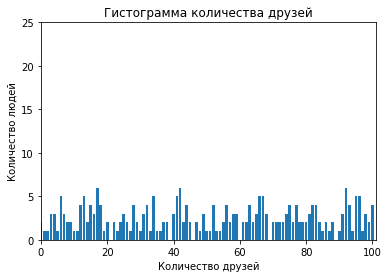

In [101]:
friend_counts = clt.Counter(num_friends)
print(friend_counts)
xs = range(101)                     # максимальное значение 100
ys = [friend_counts[x] for x in xs] # высота - количество друзей
plt.bar(xs,ys)
plt.axis([0,101,0,25])
plt.title('Гистограмма количества друзей')
plt.xlabel('Количество друзей')
plt.ylabel('Количество людей')
plt.show()



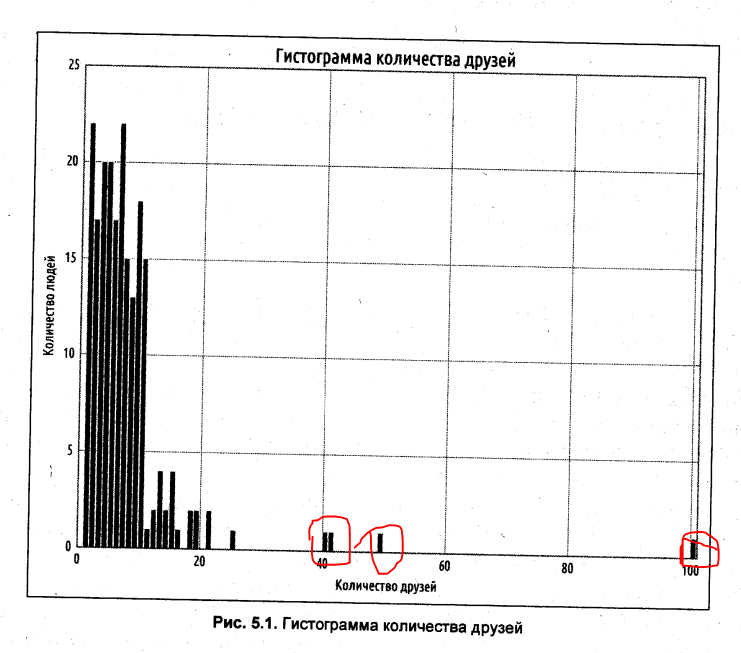

На диаграмме выше красным выделены самые "дружелюбные", однако в некоторых случаях подобные данные можно считать за аномальные, в сравнении с общей тенденцией.

К сожалению, эта диаграмма мало информативна, поэтмоу мы приступим к форматированию некоторых статистик.

самый простой статистикой является число точек данных:

In [72]:
num_points = len(num_friends) # число точек

In [98]:
num_points

250

Кроме этого, могут быть интересны наибольшие и наименьшие значения:

In [97]:
largest_value = max(num_friends)
print(largest_value)
smallest_value = min(num_friends)
print(smallest_value)

25
0


А также полезными могут быть:

In [102]:
sorted_values = sorted(num_friends) #Отсортированные значение
smallest_value = sorted_values[0] #Минимум отсортированного списка
second_smallest_value = sorted_values[1] #Следующий минимум
second_largest_value = sorted_values[-2] #Второй максимум с конца

In [107]:
print(sorted_values, '\n', 'min = ',smallest_value,
      '\n second smallest = ',second_smallest_value,
      '\n second largest = ',second_largest_value,)

[0, 0, 1, 2, 3, 3, 3, 4, 4, 4, 5, 6, 6, 6, 6, 6, 7, 7, 7, 8, 8, 9, 9, 10, 11, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 15, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 19, 20, 20, 22, 22, 23, 24, 24, 25, 25, 25, 26, 26, 27, 28, 28, 28, 28, 29, 29, 30, 31, 31, 31, 32, 32, 32, 32, 33, 34, 34, 34, 34, 34, 35, 36, 37, 37, 38, 38, 40, 40, 40, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 43, 43, 44, 44, 44, 44, 45, 45, 47, 47, 48, 49, 49, 49, 50, 51, 52, 52, 52, 52, 53, 54, 55, 55, 56, 56, 56, 56, 57, 57, 58, 58, 58, 59, 59, 59, 61, 61, 62, 62, 63, 63, 63, 63, 64, 64, 65, 65, 65, 66, 66, 66, 66, 66, 67, 67, 67, 67, 67, 68, 68, 68, 70, 70, 71, 71, 72, 72, 73, 73, 74, 74, 74, 75, 75, 75, 75, 76, 76, 77, 77, 77, 77, 78, 78, 79, 79, 80, 80, 81, 81, 81, 82, 82, 82, 82, 83, 83, 83, 83, 84, 84, 85, 86, 86, 87, 88, 88, 90, 91, 91, 91, 92, 92, 92, 92, 92, 92, 93, 93, 93, 93, 94, 95, 95, 95, 95, 95, 96, 96, 96, 96, 96, 97, 98, 98, 98, 99, 99, 100, 100, 100, 100] 
 min =  0 
 secon

## Показатели центра распределения 

Обычно мы хотим иметь некоторое предствавление о том, где находится центр данных. Чаще всего для этих целей используется среднее(или среденее арифметическое) значение, которое берется как сумма данных, деленная на их количество.

In [108]:
# среднее значение
def mean(x):
    return sum(x) / len(x)

In [109]:
mean(num_friends)

51.192

Для двух точек средней является точка, лежащая посередине между ними. По мере добавление других точек срендеее значение будет смещаться в разные стороны, в зависимости от значения каждого новой точки

Кроме среднего значнеие, иногда может понадобиться медиана, которая является ближайщим к центру значением (если число точек данных нечетное) либо средним арифметическим, взятым как полусумма двух ближайщих к центру значнией(если число точек чётное).

##### обратите внимание 
Медиана, в отличии от среднего значего - не зависит от каждого значение в наборе данных. Например, если сделать наибольшую точку еще больше( или найменьшую точку еще меньше), то срединные точки останутся неизменными, следовательно, и медиана не изменится.

Функция вычисления медианы имеет более сложную реализацию, чем можно было бы ожидать, в основном из-за того, что приходится учитывать случай с четностью:

In [110]:
def median(v):
    '''Возвращает ближайшее к середине значение для v'''
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2 # Индекс серединного значения
    
    if n % 2 == 1:
        #Если нечетное, вернуть серединное значение
        return sorted_v[midpoint]
    else:
        #Если четное, вернуть среднее 2=х серединных значений
        lo = midpoint - 1
        hi = midpoint
        return(sorted_v[lo] + sorted_v[hi]) / 2


In [111]:
median(num_friends)

52.0

Среднее значение, конечно, вычисляется проще, и оно несколько варьирует по мере изменения данных. Если у нас есть n точек, и одна из них увелиилась на любое малое число e , то среднее обязательно увеличится на e/n. (Этот факт делает его подверженным разного рода ухищрениям при калькуляции)
А для того чтобы найти медиану, данные нужно сперва отсортировать, и изменение одной из точек на любое малое число e может увиличить медиану на величину равную e, меньшую чем е, либо не изменить совсем( в зависимости от набора данных).


In [113]:
#Квантиль

def quantile(x,p):
    '''Возвращает значение в х , соответсвующее р-ому проценту данных'''
    p_index = int(p*len(x))
    return sorted(x)[p_index]

print(quantile(num_friends,0.10), '\n',
      quantile(num_friends,0.25), '\n',
      quantile(num_friends,0.75), '\n',
      quantile(num_friends,0.90), '\n',)

12 
 25 
 77 
 93 



Реже испольщуют моду - значение или значения, которые встречаются наиболее часто:

In [117]:
#Мода
def mode(x):
    counts = clt.Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
           if count == max_count]
print(mode(num_friends))

[92, 17, 42]


## Показатели вариации

Показатели вариации отражают меру изменчивости данных. Как правило, это статистические показатели, для которых значения, близкие к нулю, означиют полное отсутсвие изменчиваости, а большие значения(чтобы это ни означало) - очени большую изменчивость. Например, самым простым показателем является размах, который определяется как разница между максимальным и минимальным значениями данных:

In [118]:
#рамзах
#слово range в Python уже используется, поэтмоу берем другое
def data_range(x):
    return max(x) - min(x)
data_range(num_friends)

100

Размах равен нулю, когда max и min одинаковые, что происходит только  тогда, когда все элементы х равны между собой, и значит, изменчивость в данных отсутствует. И наоборот, когда размах широкий, то максимальное много больше минимального, и изменчивость в данных высокая.